In [ ]:
# Step 1: Upload the CSV file (must be properly quoted and UTF-8)
from google.colab import files
import pandas as pd
import io
import csv

uploaded = files.upload()  # Upload your saved tweets.csv file

filename = next(iter(uploaded))  # Automatically get filename

# Read CSV with quoting enabled to handle commas in text
df = pd.read_csv(
    io.BytesIO(uploaded[filename]),
    encoding='utf-8',
    quoting=csv.QUOTE_ALL,  # Handles tweets with commas
    on_bad_lines='skip'     # Skip problematic lines if any
)

print("✅ File loaded successfully!")
print(df.head())


KeyboardInterrupt: 

# New Section

In [ ]:
# Step 2: Clean tweet text and analyze sentiment
import re
from textblob import TextBlob

# Auto-detect tweet column
tweet_col = None
for col in df.columns:
    if 'tweet' in col.lower():
        tweet_col = col
        break
if not tweet_col:
    raise ValueError("❌ Couldn't find a tweet column in the uploaded file.")

# Function to clean tweets
def clean_tweet(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')  # remove emojis
    return text.strip()

# Apply cleaning and sentiment analysis
df[tweet_col] = df[tweet_col].apply(clean_tweet)

def detect_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df[tweet_col].apply(detect_sentiment)

print("✅ Sentiment analysis completed.")
df[['Sentiment']].value_counts()


✅ Sentiment analysis completed.


,count
Sentiment,
Neutral,2
Positive,2
Negative,1


<ipython-input-22-c3731b64c8c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


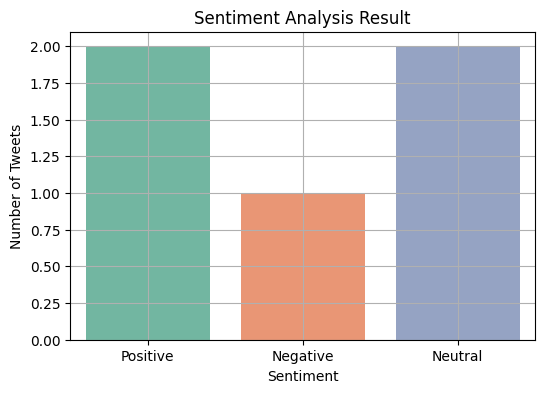

In [ ]:
# Step 3: Plot sentiment count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Analysis Result")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()


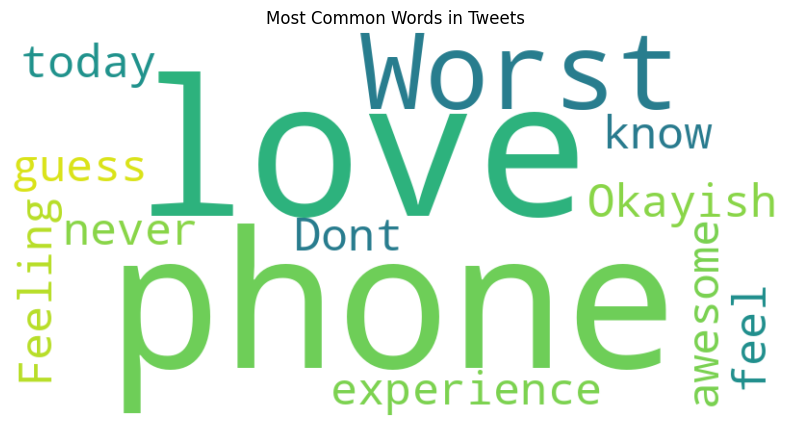

In [ ]:
# Step 4: Generate Word Cloud
from wordcloud import WordCloud

all_words = ' '.join(df[tweet_col])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()
